## Case Study on Probability for Data Science

Problem Statement:To make a suitable machine learning algorithm to predict if the mushroom is edible or poisonous (e or p) using the given dataset.(Along with other ML algorithms, Naïve Bayes’ Classifier should be applied). Also, if some data pre-processing is necessary do that as well.

In [1]:
#importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from sklearn.preprocessing import LabelEncoder, StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB, BernoulliNB, MultinomialNB
from sklearn.metrics import accuracy_score, confusion_matrix

In [3]:
data = pd.read_csv('mushrooms.csv')
data.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


In [4]:
data.shape

(8124, 23)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   class                     8124 non-null   object
 1   cap-shape                 8124 non-null   object
 2   cap-surface               8124 non-null   object
 3   cap-color                 8124 non-null   object
 4   bruises                   8124 non-null   object
 5   odor                      8124 non-null   object
 6   gill-attachment           8124 non-null   object
 7   gill-spacing              8124 non-null   object
 8   gill-size                 8124 non-null   object
 9   gill-color                8124 non-null   object
 10  stalk-shape               8124 non-null   object
 11  stalk-root                8124 non-null   object
 12  stalk-surface-above-ring  8124 non-null   object
 13  stalk-surface-below-ring  8124 non-null   object
 14  stalk-color-above-ring  

In [6]:
data.isnull().sum()

class                       0
cap-shape                   0
cap-surface                 0
cap-color                   0
bruises                     0
odor                        0
gill-attachment             0
gill-spacing                0
gill-size                   0
gill-color                  0
stalk-shape                 0
stalk-root                  0
stalk-surface-above-ring    0
stalk-surface-below-ring    0
stalk-color-above-ring      0
stalk-color-below-ring      0
veil-type                   0
veil-color                  0
ring-number                 0
ring-type                   0
spore-print-color           0
population                  0
habitat                     0
dtype: int64

#### The dataset contains 8124 rows and 23 columns.Also there are no null values in the given dataset.

In [7]:
data['class'].value_counts()

e    4208
p    3916
Name: class, dtype: int64

#### The target variable 'class' has got 'edible' as well as 'poisonous' attributes. As we can see, there are 4208 occurrences of edible mushrooms and 3916 occurrences of poisonous mushrooms in the dataset.

<AxesSubplot:xlabel='class', ylabel='count'>

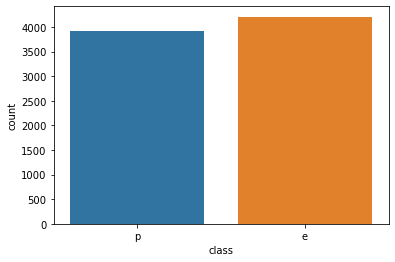

In [8]:
sns.countplot(x=data['class'])

In [9]:
data = data.astype('category')  #columns of ‘object’ datatype are changed to ‘category’ type so that label encoding can be done.

In [11]:
data.dtypes

class                       category
cap-shape                   category
cap-surface                 category
cap-color                   category
bruises                     category
odor                        category
gill-attachment             category
gill-spacing                category
gill-size                   category
gill-color                  category
stalk-shape                 category
stalk-root                  category
stalk-surface-above-ring    category
stalk-surface-below-ring    category
stalk-color-above-ring      category
stalk-color-below-ring      category
veil-type                   category
veil-color                  category
ring-number                 category
ring-type                   category
spore-print-color           category
population                  category
habitat                     category
dtype: object

In [12]:
labelenc=LabelEncoder()
for column in data.columns:
    data[column] = labelenc.fit_transform(data[column])

In [13]:
data.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,1,5,2,4,1,6,1,0,1,4,...,2,7,7,0,2,1,4,2,3,5
1,0,5,2,9,1,0,1,0,0,4,...,2,7,7,0,2,1,4,3,2,1
2,0,0,2,8,1,3,1,0,0,5,...,2,7,7,0,2,1,4,3,2,3
3,1,5,3,8,1,6,1,0,1,5,...,2,7,7,0,2,1,4,2,3,5
4,0,5,2,3,0,5,1,1,0,4,...,2,7,7,0,2,1,0,3,0,1


#### Hence the categorical values are converted into machine understandable ordinal values.

In [14]:
data['veil-type']

0       0
1       0
2       0
3       0
4       0
       ..
8119    0
8120    0
8121    0
8122    0
8123    0
Name: veil-type, Length: 8124, dtype: int32

In [15]:
data['veil-type'].value_counts()

0    8124
Name: veil-type, dtype: int64

In [16]:
# the column 'veil-type' has values 0 and is not contributing to the data. Thus it can be dropped.
data = data.drop(["veil-type"],axis=1)

### Modelling

In [19]:
# Split data for train and test
x = data.drop(["class"], axis=1)
y = data["class"]

In [20]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,random_state=42,test_size=0.2)

### Classification Models

#### Logistic Regression

In [27]:
from sklearn.linear_model import LogisticRegression
logit_model = LogisticRegression(solver='lbfgs',  max_iter=1000)
logit_model.fit(x_train,y_train)
y_pred = logit_model.predict(x_test)
print("Test Accuracy: {}%".format(round(logit_model.score(x_test,y_test)*100,2)))

Test Accuracy: 94.77%


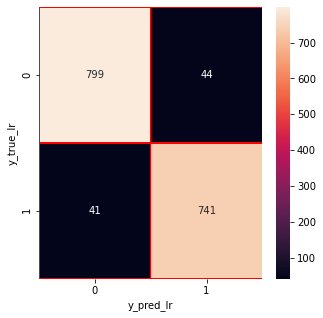

In [33]:
# CONFUSION MATRIX
y_pred_lr = logit_model.predict(x_test)
y_true_lr = y_test
cm = confusion_matrix(y_true_lr, y_pred_lr)
f, ax = plt.subplots(figsize =(5,5))
sns.heatmap(cm,annot = True,linewidths=0.5,linecolor="red",fmt = ".0f",ax=ax)
plt.xlabel("y_pred_lr")
plt.ylabel("y_true_lr")
plt.show()

#### Decision Tree

In [28]:
from sklearn.tree import DecisionTreeClassifier

DT = DecisionTreeClassifier()
DT.fit(x_train,y_train)

print("Test Accuracy: {}%".format(round(DT.score(x_test,y_test)*100,2)))

Test Accuracy: 100.0%


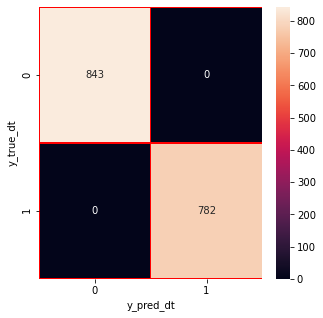

In [34]:
# CONFUSION MATRIX
y_pred_dt = DT.predict(x_test)
y_true_dt = y_test
cm = confusion_matrix(y_true_dt, y_pred_dt)
f, ax = plt.subplots(figsize =(5,5))
sns.heatmap(cm,annot = True,linewidths=0.5,linecolor="red",fmt = ".0f",ax=ax)
plt.xlabel("y_pred_dt")
plt.ylabel("y_true_dt")
plt.show()

### Naive Bayes Classification

In [29]:
from sklearn.naive_bayes import GaussianNB

nb = GaussianNB()
nb.fit(x_train,y_train)

print("Test Accuracy: {}%".format(round(nb.score(x_test,y_test)*100,2)))

Test Accuracy: 92.18%


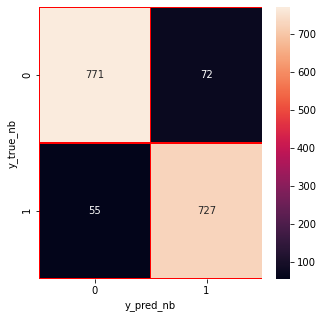

In [35]:
# CONFUSION MATRIX
y_pred_nb = nb.predict(x_test)
y_true_nb = y_test
cm = confusion_matrix(y_true_nb, y_pred_nb)
f, ax = plt.subplots(figsize =(5,5))
sns.heatmap(cm,annot = True,linewidths=0.5,linecolor="red",fmt = ".0f",ax=ax)
plt.xlabel("y_pred_nb")
plt.ylabel("y_true_nb")
plt.show()

In [30]:
from sklearn.naive_bayes import BernoulliNB

bb = BernoulliNB()
bb.fit(x_train,y_train)

print("Test Accuracy: {}%".format(round(bb.score(x_test,y_test)*100,2)))

Test Accuracy: 84.18%


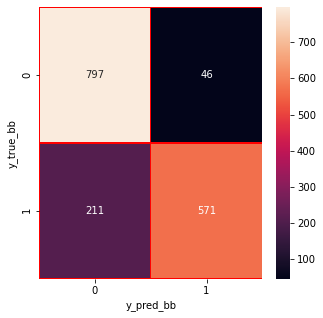

In [36]:
# CONFUSION MATRIX
y_pred_bb = bb.predict(x_test)
y_true_bb = y_test
cm = confusion_matrix(y_true_bb, y_pred_bb)
f, ax = plt.subplots(figsize =(5,5))
sns.heatmap(cm,annot = True,linewidths=0.5,linecolor="red",fmt = ".0f",ax=ax)
plt.xlabel("y_pred_bb")
plt.ylabel("y_true_bb")
plt.show()

In [31]:
from sklearn.naive_bayes import MultinomialNB

mb = MultinomialNB()
mb.fit(x_train,y_train)

print("Test Accuracy: {}%".format(round(mb.score(x_test,y_test)*100,2)))

Test Accuracy: 80.74%


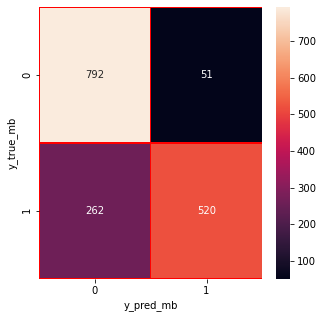

In [37]:
# CONFUSION MATRIX
y_pred_mb = mb.predict(x_test)
y_true_mb = y_test
cm = confusion_matrix(y_true_mb, y_pred_mb)
f, ax = plt.subplots(figsize =(5,5))
sns.heatmap(cm,annot = True,linewidths=0.5,linecolor="red",fmt = ".0f",ax=ax)
plt.xlabel("y_pred_mb")
plt.ylabel("y_true_mb")
plt.show()

#### KNN

In [47]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors=5,metric = 'minkowski')
classifier.fit(x_train,y_train)
y_pred=classifier.predict(x_test)  
print("Test Accuracy: {}%".format(round(classifier.score(x_test,y_test)*100,2)))

Test Accuracy: 99.63%


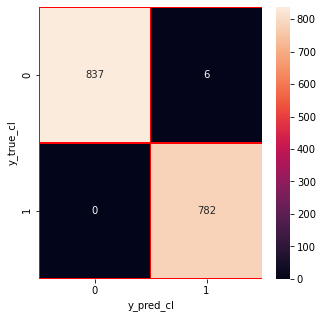

In [48]:
# CONFUSION MATRIX
y_pred_cl = classifier.predict(x_test)
y_true_cl = y_test
cm = confusion_matrix(y_true_cl, y_pred_cl)
f, ax = plt.subplots(figsize =(5,5))
sns.heatmap(cm,annot = True,linewidths=0.5,linecolor="red",fmt = ".0f",ax=ax)
plt.xlabel("y_pred_cl")
plt.ylabel("y_true_cl")
plt.show()